In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
from glob import glob

In [9]:
data_dir = r'C:\Users\nandi\OneDrive\Desktop\Minor Project\Prepared_data'

In [15]:
train_closed_eyes = glob(os.path.join(data_dir, 'Train/Closed Eyes/*.png'))
train_open_eyes = glob(os.path.join(data_dir, 'Train/Open Eyes/*.png'))
test_closed_eyes = glob(os.path.join(data_dir, 'Test/Closed Eyes/*.png'))
test_open_eyes = glob(os.path.join(data_dir, 'Test/Open Eyes/*.png'))

In [16]:
image_paths = train_closed_eyes + train_open_eyes + test_closed_eyes + test_open_eyes

In [17]:
print(f"Total number of images: {len(image_paths)}")
print(f"Number of training images (Closed Eyes): {len(train_closed_eyes)}")
print(f"Number of training images (Open Eyes): {len(train_open_eyes)}")
print(f"Number of test images (Closed Eyes): {len(test_closed_eyes)}")
print(f"Number of test images (Open Eyes): {len(test_open_eyes)}")

Total number of images: 84898
Number of training images (Closed Eyes): 39866
Number of training images (Open Eyes): 40442
Number of test images (Closed Eyes): 2080
Number of test images (Open Eyes): 2510


In [24]:
def display_images(train_closed_eyes, n_images=5):
    # Check if there are enough images to display
    if len(train_closed_eyes) < n_images:
        print(f"Not enough images to display. Found only {len(train_closed_eyes)} images.")
        n_images = len(image_paths)
    
    # Display the images
    plt.figure(figsize=(15, 10))
    for i in range(n_images):
        img = Image.open(train_closed_eyes[i])
        plt.subplot(1, n_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

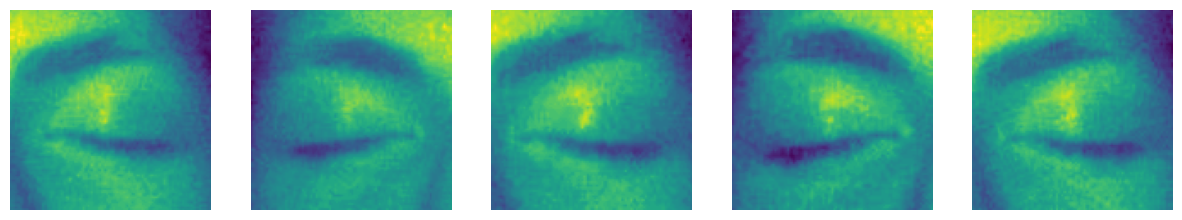

In [25]:
display_images(train_closed_eyes, n_images=5)

In [26]:
def display_images(train_open_eyes, n_images=5):
    # Check if there are enough images to display
    if len(train_closed_eyes) < n_images:
        print(f"Not enough images to display. Found only {len(train_open_eyes)} images.")
        n_images = len(image_paths)
    
    # Display the images
    plt.figure(figsize=(15, 10))
    for i in range(n_images):
        img = Image.open(train_open_eyes[i])
        plt.subplot(1, n_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

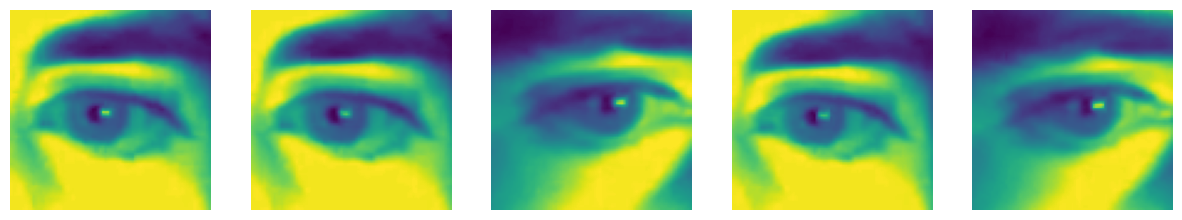

In [27]:
display_images(train_open_eyes, n_images=5)

In [28]:
image_shapes = []
for img_path in train_open_eyes[:100]:  # Checking shapes of first 100 images
    img = Image.open(img_path)
    image_shapes.append(img.size)

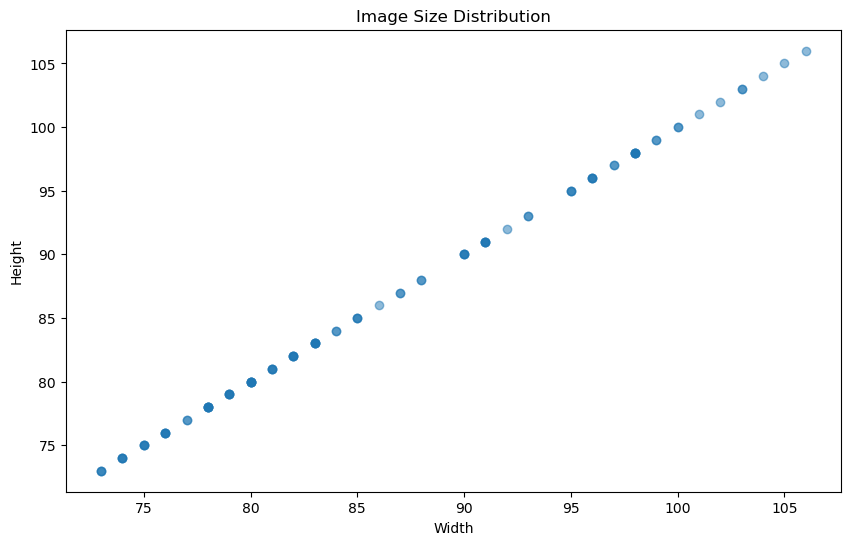

In [29]:
image_shapes = np.array(image_shapes)
plt.figure(figsize=(10, 6))
plt.scatter(image_shapes[:, 0], image_shapes[:, 1], alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

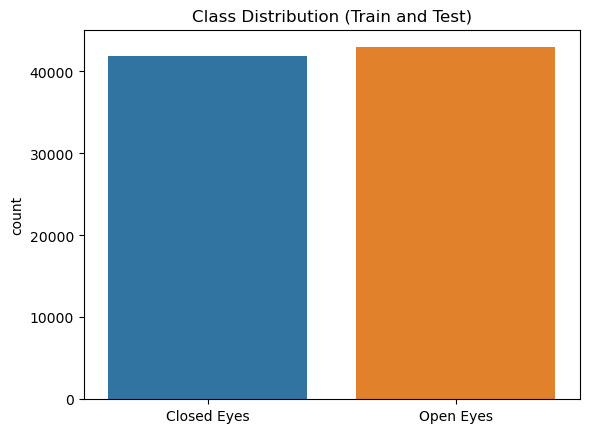

In [30]:
classes = ['Closed Eyes'] * len(train_closed_eyes) + ['Open Eyes'] * len(train_open_eyes) \
          + ['Closed Eyes'] * len(test_closed_eyes) + ['Open Eyes'] * len(test_open_eyes)
sns.countplot(x=classes)
plt.title('Class Distribution (Train and Test)')
plt.show()

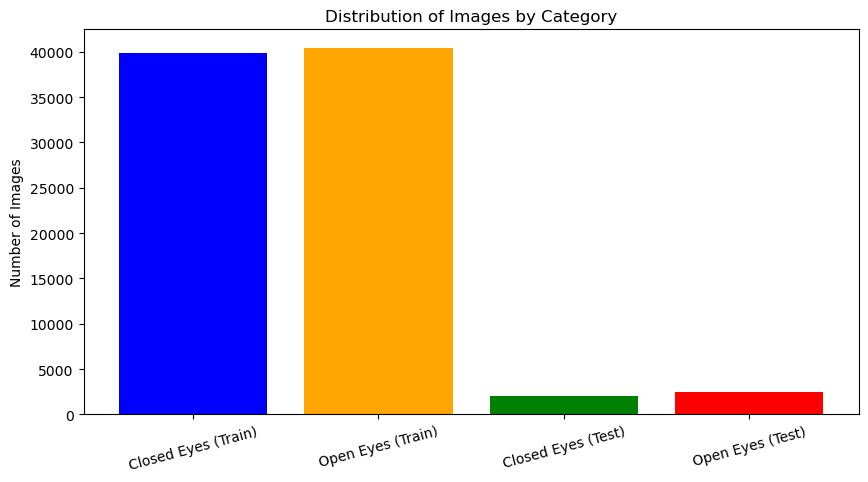

In [31]:
categories = ['Closed Eyes (Train)', 'Open Eyes (Train)', 'Closed Eyes (Test)', 'Open Eyes (Test)']
counts = [len(train_closed_eyes), len(train_open_eyes), len(test_closed_eyes), len(test_open_eyes)]

# Plotting the distribution
plt.figure(figsize=(10, 5))
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Images by Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.show()

In [32]:
def get_image_dimensions(image_paths):
    dimensions = []
    for img_path in image_paths:
        img = Image.open(img_path)
        dimensions.append(img.size)  # (width, height)
    return dimensions

# Get dimensions
train_closed_eyes_dims = get_image_dimensions(train_closed_eyes)
train_open_eyes_dims = get_image_dimensions(train_open_eyes)
test_closed_eyes_dims = get_image_dimensions(test_closed_eyes)
test_open_eyes_dims = get_image_dimensions(test_open_eyes)

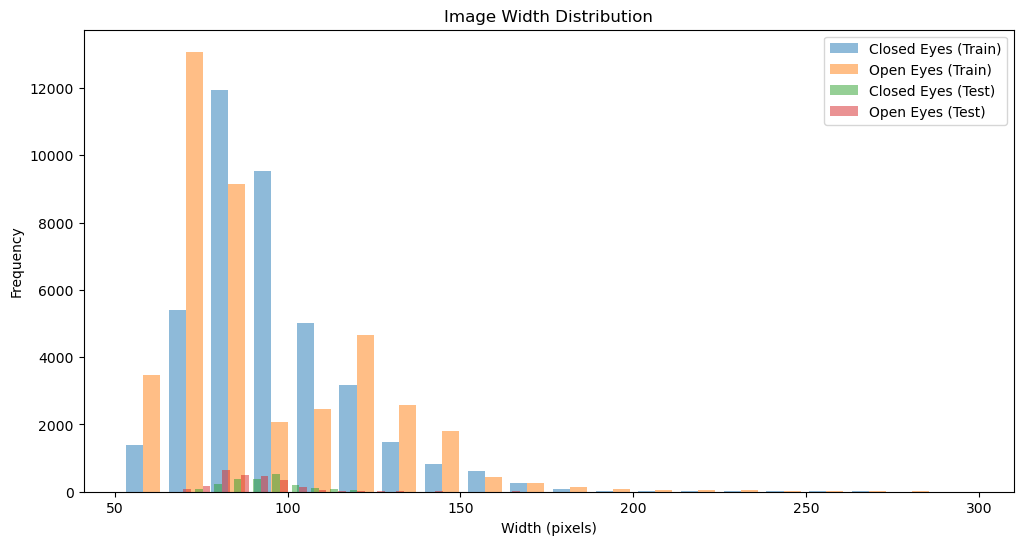

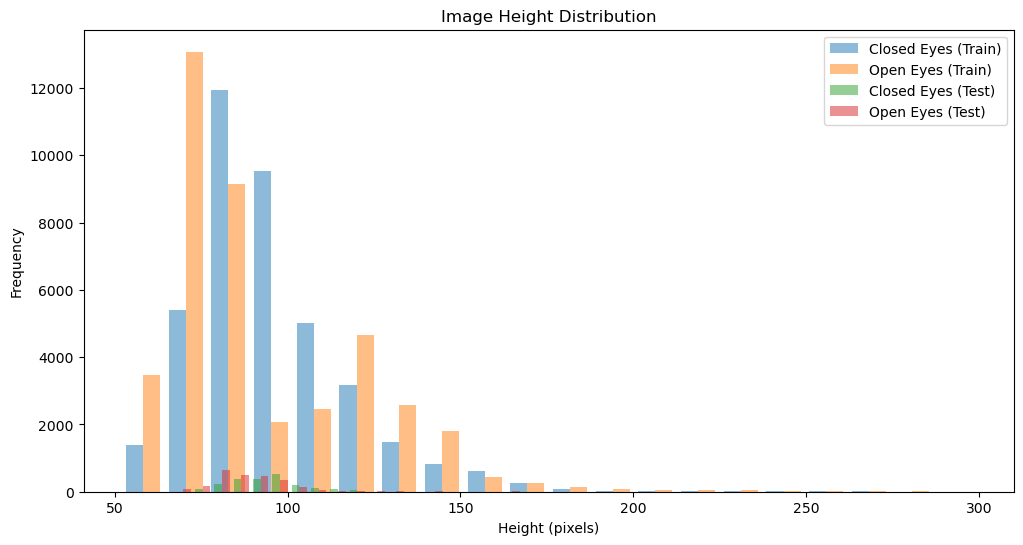

In [33]:
train_closed_eyes_dims = np.array(train_closed_eyes_dims)
train_open_eyes_dims = np.array(train_open_eyes_dims)
test_closed_eyes_dims = np.array(test_closed_eyes_dims)
test_open_eyes_dims = np.array(test_open_eyes_dims)

# Plotting dimensions
plt.figure(figsize=(12, 6))
plt.hist([train_closed_eyes_dims[:, 0], train_open_eyes_dims[:, 0]], bins=20, alpha=0.5, label=['Closed Eyes (Train)', 'Open Eyes (Train)'])
plt.hist([test_closed_eyes_dims[:, 0], test_open_eyes_dims[:, 0]], bins=20, alpha=0.5, label=['Closed Eyes (Test)', 'Open Eyes (Test)'])
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist([train_closed_eyes_dims[:, 1], train_open_eyes_dims[:, 1]], bins=20, alpha=0.5, label=['Closed Eyes (Train)', 'Open Eyes (Train)'])
plt.hist([test_closed_eyes_dims[:, 1], test_open_eyes_dims[:, 1]], bins=20, alpha=0.5, label=['Closed Eyes (Test)', 'Open Eyes (Test)'])
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [36]:
pip install torchvision

     ---------------------------------------- 1.3/1.3 MB 250.1 kB/s eta 0:00:00
     ------------------------------------ 199.3/199.3 MB 819.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from torchvision import transforms

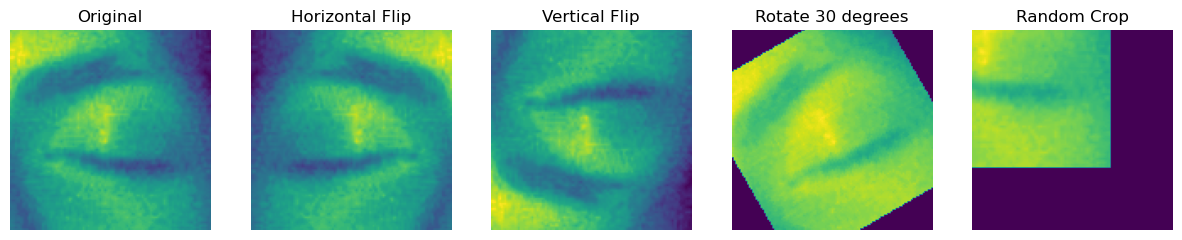

In [38]:
def show_augmentation_examples(image_path):
    img = Image.open(image_path)
    augmentations = {
        'Original': img,
        'Horizontal Flip': transforms.functional.hflip(img),
        'Vertical Flip': transforms.functional.vflip(img),
        'Rotate 30 degrees': transforms.functional.rotate(img, 30),
        'Random Crop': transforms.functional.crop(img, 50, 50, 100, 100)
    }
    
    plt.figure(figsize=(15, 8))
    for i, (title, augmented_img) in enumerate(augmentations.items()):
        plt.subplot(1, len(augmentations), i+1)
        plt.imshow(augmented_img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Show augmentation examples for a random image
random_image_path = train_closed_eyes[0]  # Change this if needed
show_augmentation_examples(random_image_path)